# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

Pada kasus ini, saya akan melakukan wrangling data dari _website_ imdb `(https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31)` untuk mengambil data judul film, imdb rating, metascore, dan vote. Data yang saya ambil berdasarkan daftar 50 film yang dirilis pada tanggal 1 Januari 2021 hingga 31 Desember 2021, diurutkan berdasarkan popularitas oleh _website_ imdb.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n      '

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [328]:
#mengambil semua code yang berisi data yang akan kita proses. Berisi data judul, imdb rating, metascore, dan vote dari 50 film.
table = soup.find('div', attrs={'class':'lister list detail sub-list'})
print(table.prettify()[1:60000])

div class="lister list detail sub-list">
 <div class="lister-list">
  <div class="lister-item mode-advanced">
   <div class="lister-top-right">
    <div class="ribbonize" data-caller="filmosearch" data-tconst="tt8179402">
    </div>
   </div>
   <div class="lister-item-image float-left">
    <a href="/title/tt8179402/">
     <img alt="Fate: The Winx Saga" class="loadlate" data-tconst="tt8179402" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BMzEyYzBhODYtZjZlOC00MTM4LWIxMjQtMTRhZjA5ODM4ZWI2XkEyXkFqcGdeQXVyODQwODA1MjY@._V1_UY98_CR5,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
    </a>
   </div>
   <div class="lister-item-content">
    <h3 class="lister-item-header">
     <span class="lister-item-index unbold text-primary">
      1.
     </span>
     <a href="/title/tt8179402/">
      Fate: The Winx Saga
     </a>
     <span class="lister-item-year text-muted unbold">
      (2021– )
     </span>
    </h3>
    <p class="tex

In [92]:
#mengambil data judul film dari 'table'
judul = table.find_all('h3', attrs={'class':'lister-item-header'})[0].find('a').text
judul

'Fate: The Winx Saga'

In [332]:
#mengambil data imdb_rating dari 'table'
imdb_rating = table.find_all('div', attrs={'class':'inline-block ratings-imdb-rating'})[0].find('strong').text
imdb_rating

'6.9'

In [337]:
#mengambil data metascore dari 'table' 
metascore = table.find_all('div', attrs={'class':'ratings-bar'})[4]
metascore

<div class="ratings-bar">
<div class="inline-block ratings-imdb-rating" data-value="7" name="ir">
<span class="global-sprite rating-star imdb-rating"></span>
<strong>7.0</strong>
</div>
<div class="inline-block ratings-user-rating">
<span class="userRatingValue" data-tconst="tt7144666" id="urv_tt7144666">
<span class="global-sprite rating-star no-rating"></span>
<span class="rate" data-no-rating="Rate this" data-value="0" name="ur">Rate this</span>
</span>
<div class="starBarWidget" id="sb_tt7144666">
<div class="rating rating-list" data-csrf-token="" data-ga-identifier="" data-starbar-class="rating-list" data-user="" id="tt7144666|imdb|7|7|adv_li_tt||advsearch|title" itemprop="aggregateRating" itemscope="" itemtype="http://schema.org/AggregateRating" title="Users rated this 7/10 (112,985 votes) - click stars to rate">
<meta content="7" itemprop="ratingValue"/>
<meta content="10" itemprop="bestRating"/>
<meta content="112985" itemprop="ratingCount"/>
<span class="rating-bg"> </span>
<s

In [334]:
# mengambil data total vote dari 'table'
vote = table.find_all('div', attrs={'class':'ratings-bar'})[0].find('meta', attrs={'itemprop':'ratingCount'})['content']
vote

'44500'

Finding row length.

In [11]:
#jumlah baris
jumlah = table.find_all('h3', attrs={'class':'lister-item-header'})
jumlah_row = len(jumlah)
jumlah_row

50

Do the scrapping process here (please change this markdown with your explanation)

Penjelasan:
1. Membuat placeholder
2. Menentukan i untuk looping, dengan range 0 dan jumlah_row (50)
3. Membuat loop nama judul dan mengambil nama judul dengan menggunakan `.text`
4. Membuat loop imdb rating dan mengambil imdb rating dengan menggunakan `.text`
5. Membuat loop metascore dengan kondisi:
    - Jika film memiliki metascore, maka data akan diisi dengan angka metascore dengan menggunakan `.text`
    - Jika film tidak memiliki metascore, maka data diisi dengan angka 0
6. Membuat loop total vote dan mengambil total vote dengan menggunakan `.text`

In [345]:
temp = [] #initiating a tuple

for i in range(0, jumlah_row):
    #mendapatkan judul
    title = table.find_all('h3', attrs={'class':'lister-item-header'})[i].find('a').text
    
    #mendapatkan imdb
    rating_imdb = table.find_all('div', attrs={'class':'inline-block ratings-imdb-rating'})[i].find('strong').text
    
    #mendapatkan metascore
    metascore = table.find_all('div', attrs={'class':'ratings-bar'})[i]
    ali = metascore.find('div', attrs={'class':'inline-block ratings-metascore'})
    if (ali is not None):
        skor_ali=ali.find('span').text.strip()
    else:
        skor_ali=0
        
    #mendapatkan total vote
    total_vote = table.find_all('div', attrs={'class':'ratings-bar'})[i].find('meta', attrs={'itemprop':'ratingCount'})['content']
    
    temp.append((title, rating_imdb, skor_ali, total_vote))
    
temp 

[('Fate: The Winx Saga', '6.9', 0, '44500'),
 ('The White Lotus', '7.6', 0, '67693'),
 ('Only Murders in the Building', '8.1', 0, '96341'),
 ('Abbott Elementary', '8.2', 0, '13709'),
 ('The Black Phone', '7.0', '65', '112985'),
 ('Resident Alien', '8.1', 0, '39222'),
 ('American Horror Stories', '6.2', 0, '20775'),
 ('1883', '8.8', 0, '63192'),
 ('Reservation Dogs', '8.1', 0, '14613'),
 ('Spider-Man: No Way Home', '8.3', '71', '730388'),
 ('La scuola cattolica', '5.7', 0, '1796'),
 ('Dune: Part One', '8.0', '74', '614389'),
 ('Licorice Pizza', '7.2', '90', '105517'),
 ('Forsvinningen på Lørenskog', '6.1', 0, '1064'),
 ('Dopesick', '8.6', 0, '54541'),
 ("NCIS: Hawai'i", '6.3', 0, '5532'),
 ('Mona Lisa and the Blood Moon', '6.2', '69', '1007'),
 ('The Little Things', '6.3', '54', '99615'),
 ('Bloodlands', '6.6', 0, '5076'),
 ('Arcane: League of Legends', '9.0', 0, '197834'),
 ('Yellowjackets', '7.9', 0, '44872'),
 ('The Wheel of Time', '7.1', 0, '102410'),
 ('Sing 2', '7.4', '49', '65790

## Creating data frame & Data wrangling

Put the array into dataframe

In [357]:
import pandas as pd

df = pd.DataFrame(temp, columns=('Title', 'IMDB_Rating', 'Metascore','Total_Vote'))
df.head()

,Title,IMDB_Rating,Metascore,Total_Vote
0,Fate: The Winx Saga,6.9,0,44500
1,The White Lotus,7.6,0,67693
2,Only Murders in the Building,8.1,0,96341
3,Abbott Elementary,8.2,0,13709
4,The Black Phone,7.0,65,112985


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

Penjelasan:
1. Mengubah tipe data [IMDB_Rating] menjadi `float64`
2. Mengubah tipe data [Metascore] dan [Total_Vote] menjadi `int64`

In [348]:
df.dtypes

Title          object
IMDB_Rating    object
Metascore      object
Total_Vote     object
dtype: object

In [364]:
#mengubah tipe data
df['IMDB_Rating'] = df['IMDB_Rating'].astype('float64')
df[['Metascore', 'Total_Vote']] = df[['Metascore', 'Total_Vote']].astype('int64')
df.head()

,IMDB_Rating,Metascore,Total_Vote
Title,,,
Fate: The Winx Saga,6.9,0,44500
The White Lotus,7.6,0,67693
Only Murders in the Building,8.1,0,96341
Abbott Elementary,8.2,0,13709
The Black Phone,7.0,65,112985


Data visualisation (please change this markdown with your explanation of what you do for data wrangling)


Penjelasan:
1. Menentukan [Title] sebagai index dataframe
2. Membuang kolom [IMDB_Rating] dan [Metascore] untuk membuat plot berdasarkan [Total_Vote]

In [358]:
#menentukan kolom Title sebagai index
df = df.set_index('Title')
df.head()

,IMDB_Rating,Metascore,Total_Vote
Title,,,
Fate: The Winx Saga,6.9,0,44500
The White Lotus,7.6,0,67693
Only Murders in the Building,8.1,0,96341
Abbott Elementary,8.2,0,13709
The Black Phone,7.0,65,112985


In [366]:
#membuang kolom IMDB_Rating dan Metascore
plot_2 = df.drop(['IMDB_Rating','Metascore'], axis=1)
plot_2.head()

,Total_Vote
Title,
Fate: The Winx Saga,44500
The White Lotus,67693
Only Murders in the Building,96341
Abbott Elementary,13709
The Black Phone,112985


In [372]:
#membuat plot film berdasarkan total vote
vote_plot = plot_2.sort_values(by='Total_Vote', ascending=True)
vote_plot

,Total_Vote
Title,
Mona Lisa and the Blood Moon,1007
Forsvinningen på Lørenskog,1064
La scuola cattolica,1796
FBI: International,3887
Home Economics,3997
Bloodlands,5076
NCIS: Hawai'i,5532
Law & Order: Organized Crime,7080
Snabba cash,9293


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:ylabel='Title'>

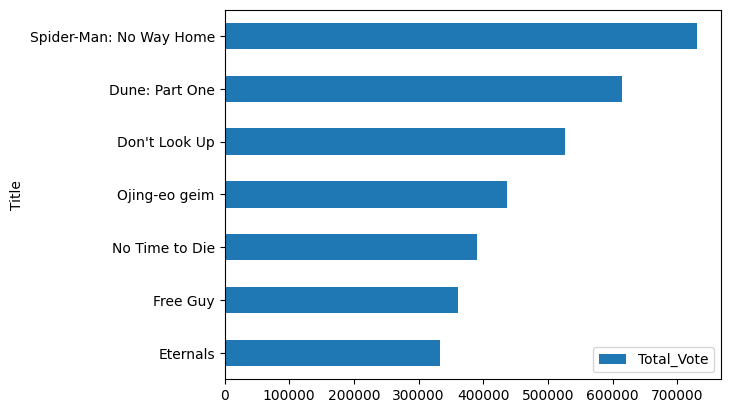

In [369]:
vote_plot.tail(7).plot.barh()

(Put your analysis and conclusion here.)

1. Film dengan total vote tertinggi adalah Spider-Man: No Way Home
2. Film dengan total vote terendah adalah Mona Lisa and the Blood Moon
3. Semakin tinggi vote, belum tentu imdb ratingnya juga tinggi sehingga vote/popularitas tidak menjamin nilai keseluruhan film yang diambil dari rating imdb

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.